Converged at iteration no. 2
Converged at iteration no. 2
Converged at iteration no. 1
Converged at iteration no. 1
Converged at iteration no. 2
Converged at iteration no. 2
Converged at iteration no. 2
Converged at iteration no. 2
Converged at iteration no. 2
Converged at iteration no. 3
Converged at iteration no. 3
Converged at iteration no. 4
Converged at iteration no. 4
Converged at iteration no. 5
Converged at iteration no. 7


(0.0, 1.0)

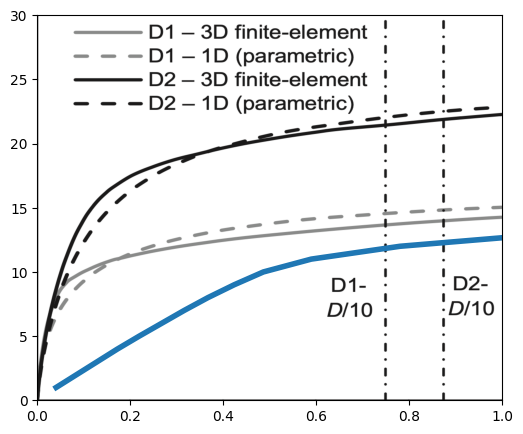

In [2]:
# test D1 Cowden clay from paper Byrne et al (2020)

import numpy as np
import matplotlib.pyplot as plt

from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Cowden_clay

from openpile.analyses import simple_winkler_analysis

pile = Pile.create_tubular(name="", top_elevation=0, bottom_elevation=-22.5, diameter=7.5, wt=0.068)
sp = SoilProfile(
    name="",
    top_elevation=0,
    water_line=10,
    layers=[
        Layer(
            name="",
            top=0,
            bottom=-22.5,
            weight=21,
            lateral_model=Cowden_clay(Su=[100, 160], G0=[150e3, 350e3]),
        )
    ],
)

M = Model(name="", pile=pile, soil=sp, coarseness=1.0)
M.set_support(elevation=-22.5, Tx=True)

vg = []
applied_loads = np.linspace(1, 15, 15)
e = 37.5

for Hg in applied_loads:
    M.set_pointload(elevation=0, Py=Hg * 1e3, Mz=-Hg * 1e3 * e)
    result = simple_winkler_analysis(M)

    vg.append(result.deflection["Deflection [m]"][0])

fig, ax = plt.subplots(figsize=[6, 5])
im = plt.imread("Cowden_Clay_D1_and_D2_piles.png")
im = ax.imshow(im, extent=[0, 1, 0, 30], aspect="auto")
ax.plot(vg, applied_loads, linewidth=4)
ax.set_xlim([0, 1])
